# 1.1 Imports

In [1]:
#import libraries 
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
sns.set_theme()

In [2]:
%%time
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

CPU times: total: 203 ms
Wall time: 192 ms


C:\Users\derek\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
%%time

df1 = pd.read_csv('df1.csv',index_col=0)
df2 = pd.read_csv('df2.csv',index_col=0)
df3 = pd.read_csv('df3.csv',index_col=0)
df4 = pd.read_csv('df4.csv',index_col=0)
df5 = pd.read_csv('df5.csv',index_col=0)
df6 = pd.read_csv('df6.csv',index_col=0)
df7 = pd.read_csv('df7.csv',index_col=0)
sets=[df1,df2,df3,df4,df5,df6,df7]


CPU times: total: 1.67 s
Wall time: 1.67 s


# 2.0 Classification tools

## 2.1 Gradient Boosting

df1
Learning rate:  1
Accuracy score (training): 0.384
Accuracy score (validation): 0.382


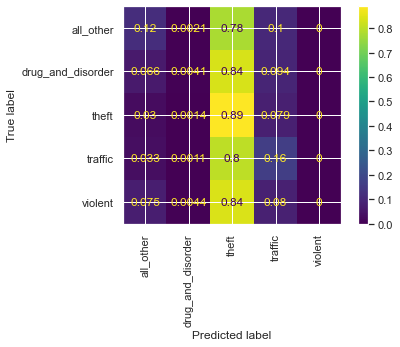

df2
Learning rate:  1
Accuracy score (training): 0.379
Accuracy score (validation): 0.378


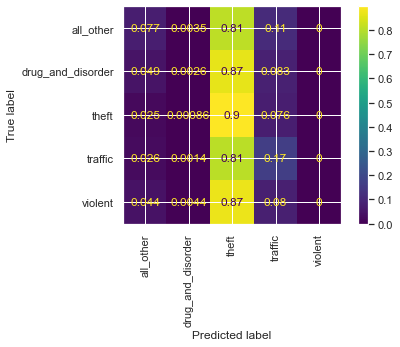

df3
Learning rate:  1
Accuracy score (training): 0.383
Accuracy score (validation): 0.383


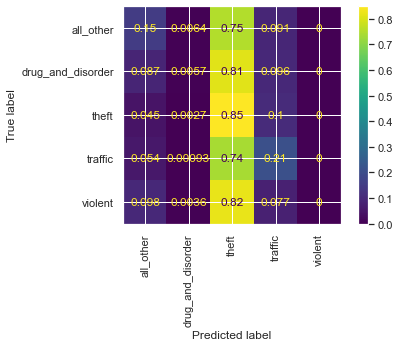

df4
Learning rate:  1
Accuracy score (training): 0.374
Accuracy score (validation): 0.372


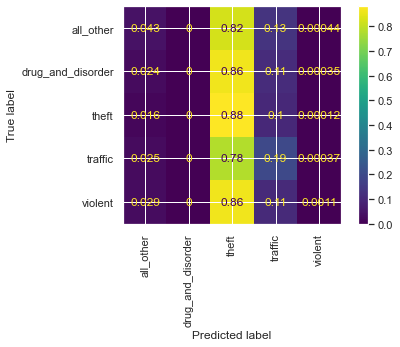

df5
Learning rate:  1
Accuracy score (training): 0.373
Accuracy score (validation): 0.373


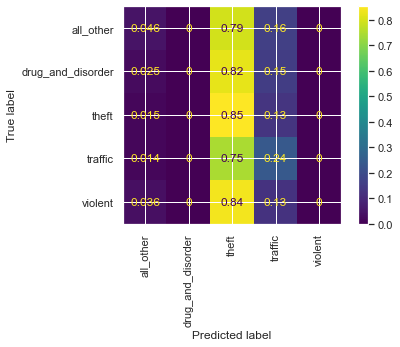

df6
Learning rate:  1
Accuracy score (training): 0.366
Accuracy score (validation): 0.365


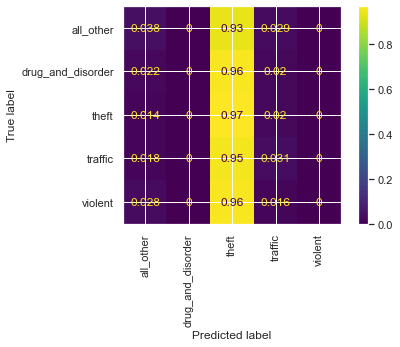

df7
Learning rate:  1
Accuracy score (training): 0.375
Accuracy score (validation): 0.374


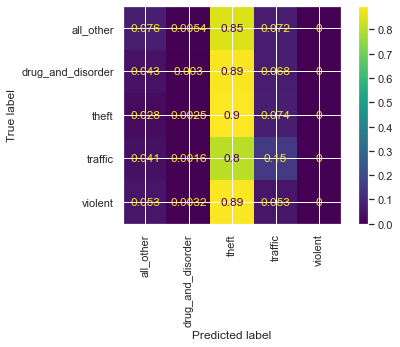

CPU times: total: 2min 4s
Wall time: 2min 6s


In [5]:
%%time

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
#replace for time
learning_rates = [1]
for idx, df in enumerate(sets):
    print('df'+str(idx+1))
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    for learning_rate in learning_rates:
        gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate,
                                        max_features=2, 
                                        max_depth = 2, 
                                        random_state = 0)
        model_res = gb.fit(X_train_scaled, y_train)
        y_pred = model_res.predict(X_test_scaled)
        print("Learning rate: ", learning_rate)
        print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_scaled, y_train)))
        print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test_scaled, y_test)))
        disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                                       display_labels=gb.classes_,
                                                       xticks_rotation='vertical',
                                                       normalize='true') 
        plt.show()

##  2.2 Random Forest

df1
Random Forest: Accuracy=0.466
Random Forest: f1-score=0.458


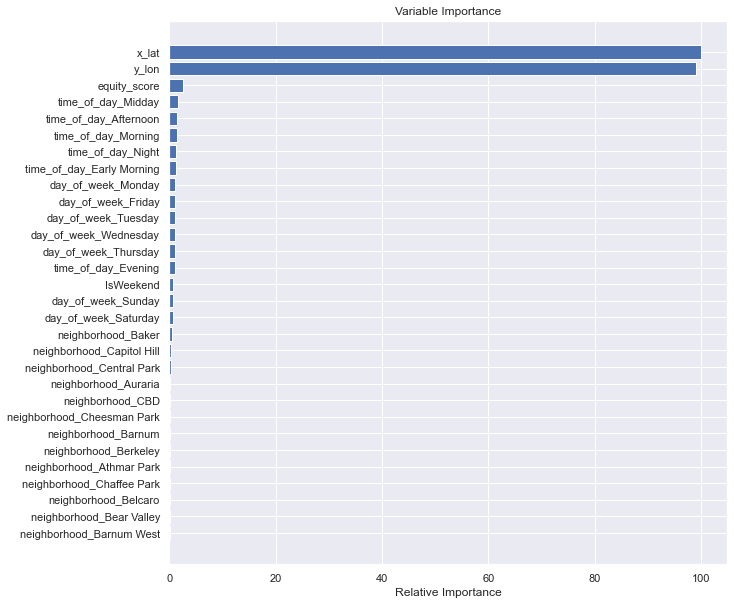

<Figure size 432x288 with 0 Axes>

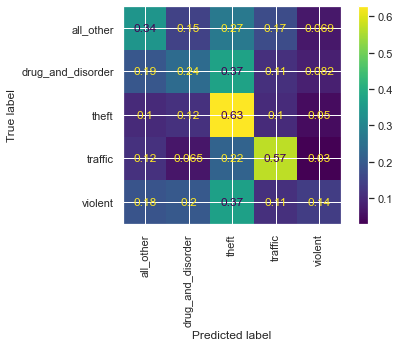

df2
Random Forest: Accuracy=0.395
Random Forest: f1-score=0.331


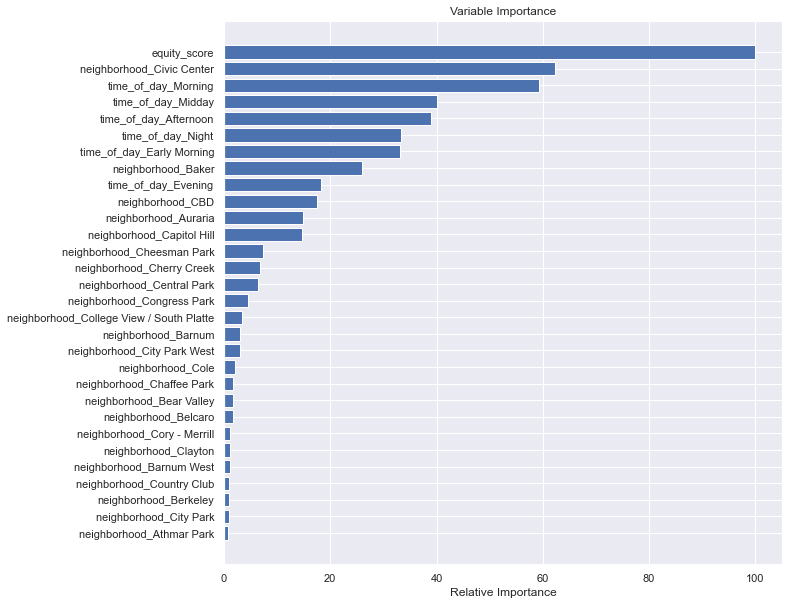

<Figure size 432x288 with 0 Axes>

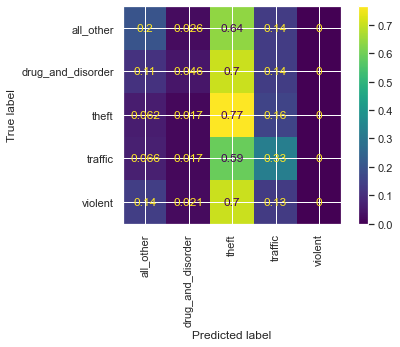

df3
Random Forest: Accuracy=0.398
Random Forest: f1-score=0.337


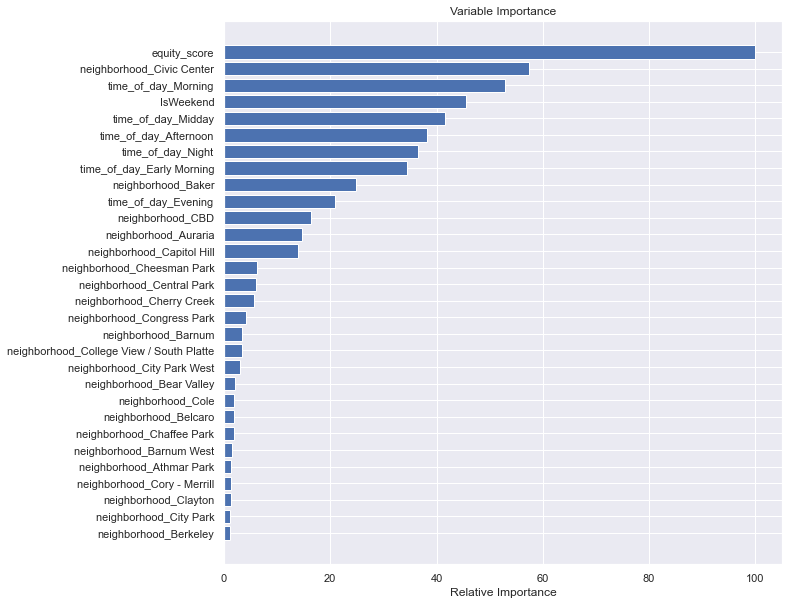

<Figure size 432x288 with 0 Axes>

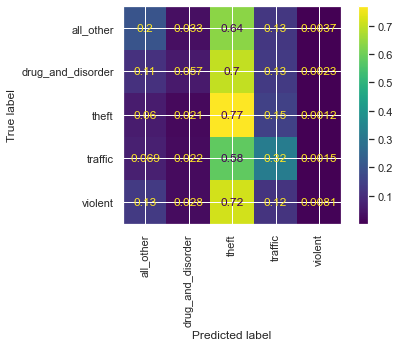

df4
Random Forest: Accuracy=0.397
Random Forest: f1-score=0.339


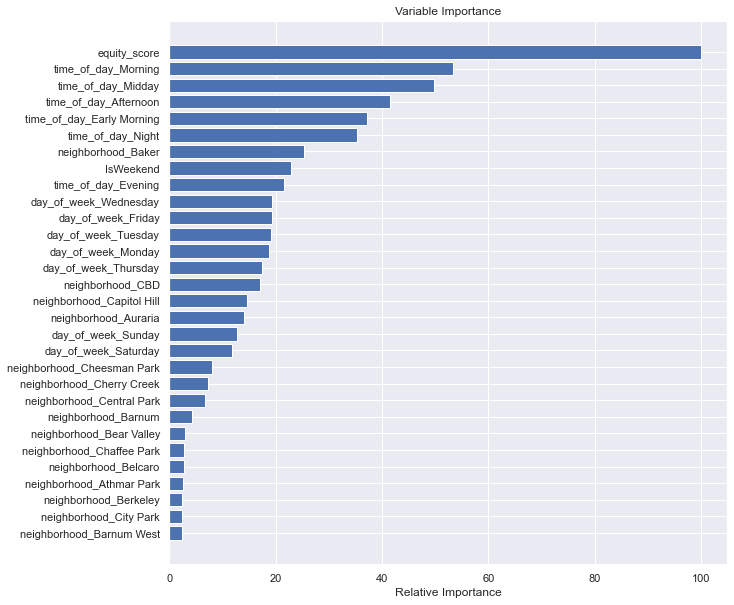

<Figure size 432x288 with 0 Axes>

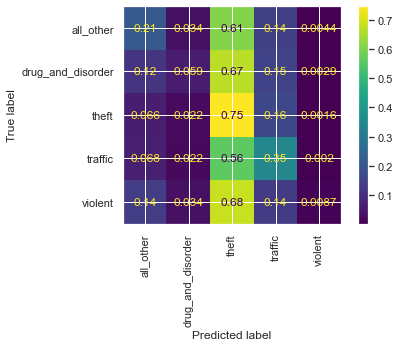

df5
Random Forest: Accuracy=0.381
Random Forest: f1-score=0.299


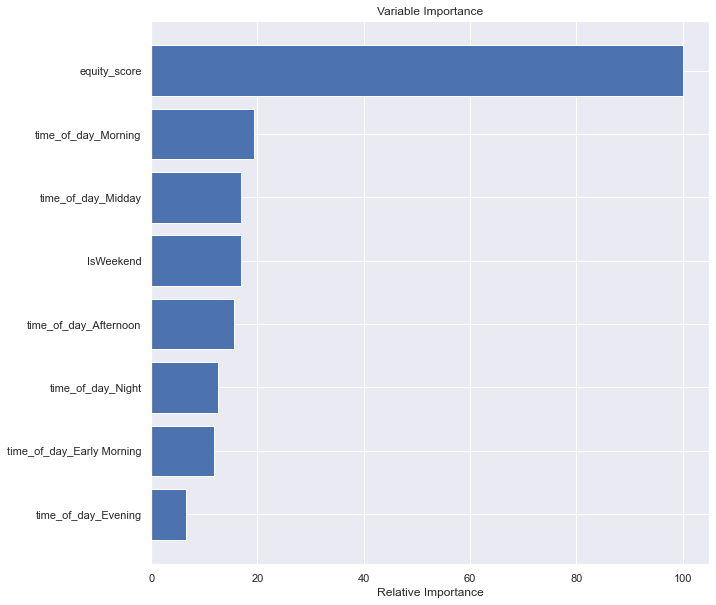

<Figure size 432x288 with 0 Axes>

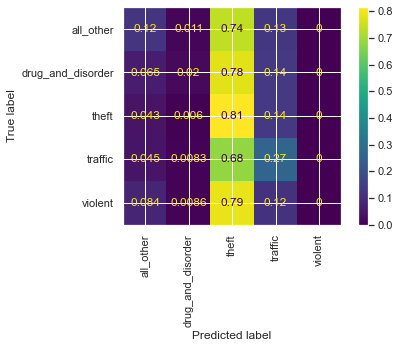

df6
Random Forest: Accuracy=0.366
Random Forest: f1-score=0.242


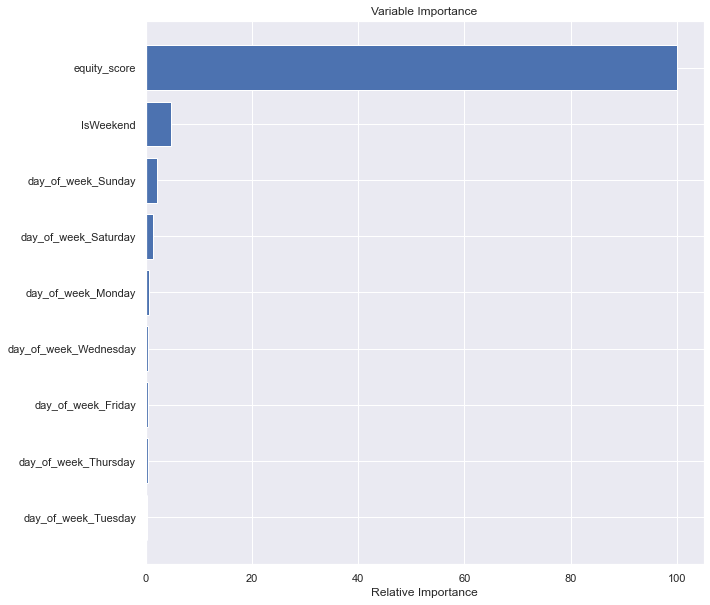

<Figure size 432x288 with 0 Axes>

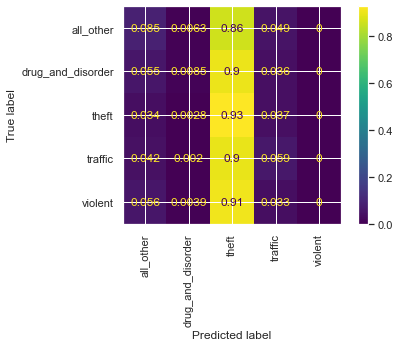

df7
Random Forest: Accuracy=0.383
Random Forest: f1-score=0.294


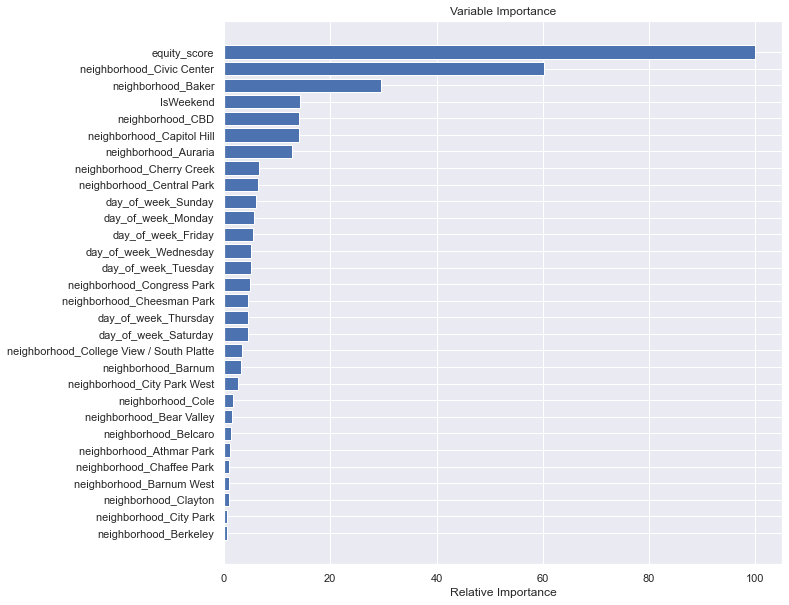

<Figure size 432x288 with 0 Axes>

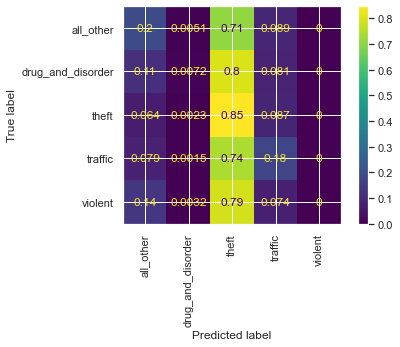

CPU times: total: 6min 19s
Wall time: 1min 30s


In [6]:
%%time
for idx, df in enumerate(sets):
    print('df'+str(idx+1))
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    clf = RandomForestClassifier(n_estimators=25, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train_scaled, y_train)
    y_pred = model_res.predict(X_test_scaled)
    y_pred_prob = model_res.predict_proba(X_test_scaled)
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print('Random Forest: Accuracy=%.3f' % (ac))
    print('Random Forest: f1-score=%.3f' % (f1))
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
    sorted_idx = np.argsort(feature_importance)[:30]
    pos = np.arange(sorted_idx.shape[0]) + .5
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    plt.clf()
    disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=clf.classes_,
                                                   xticks_rotation='vertical',
                                                   normalize='true') 
    plt.show()

In [7]:
np.unique(y_test)

array(['all_other', 'drug_and_disorder', 'theft', 'traffic', 'violent'],
      dtype=object)

## 2.3 XGB Classifier

df1
[11:14:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363346


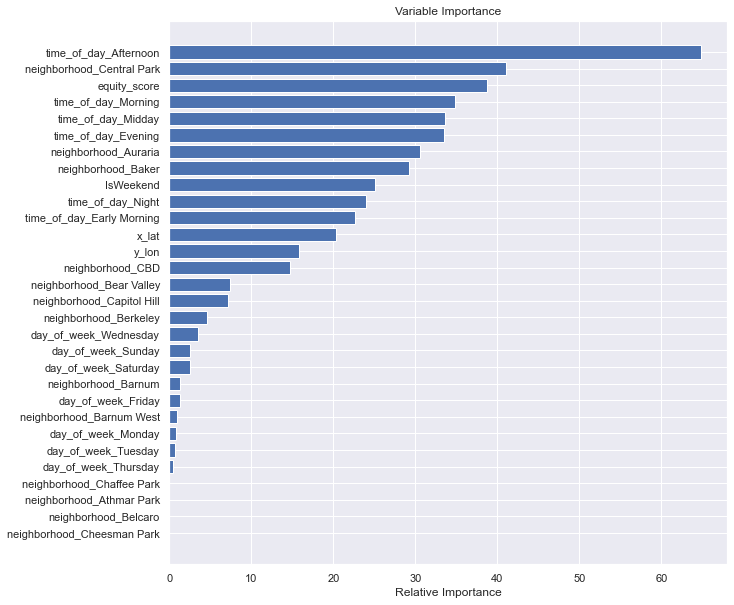

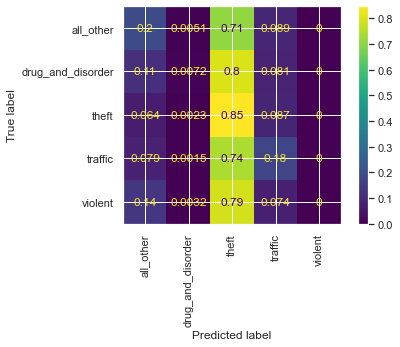

df2
[11:15:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363335


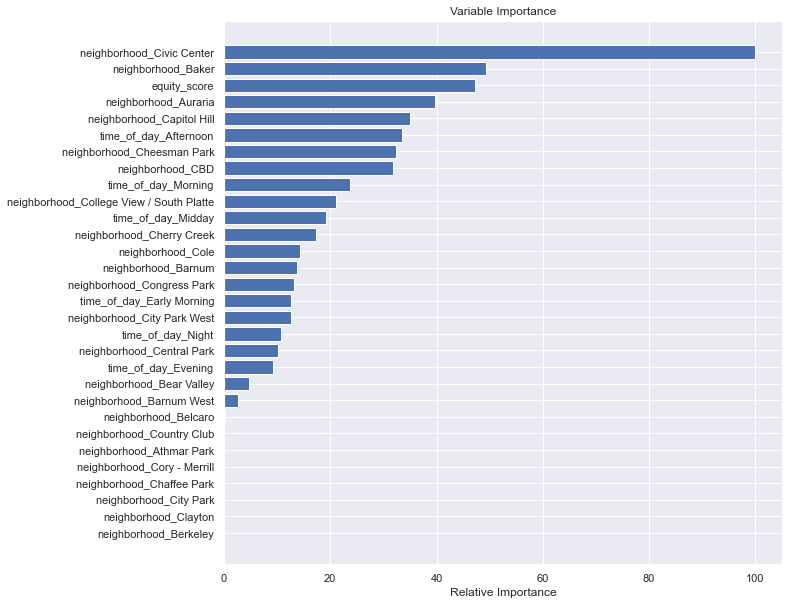

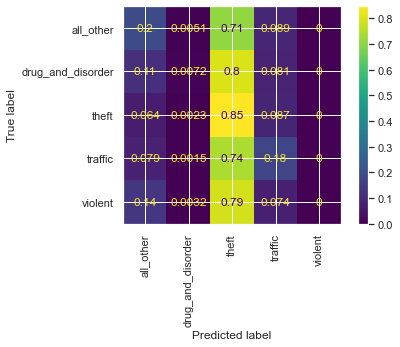

df3
[11:15:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363335


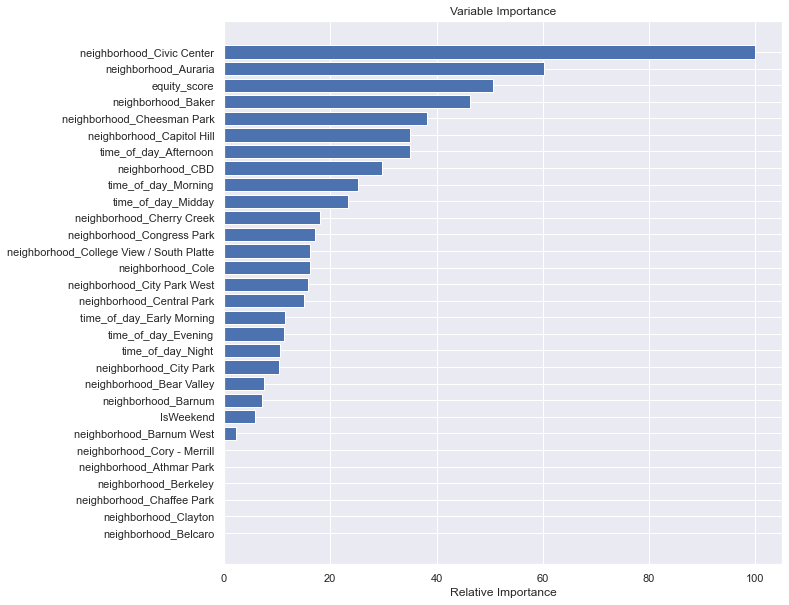

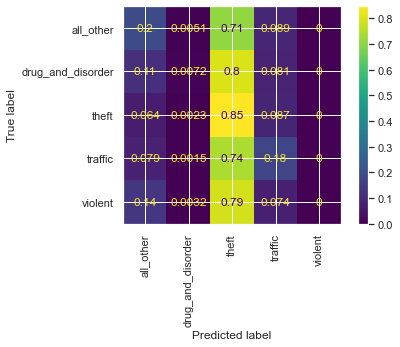

df4
[11:15:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363335


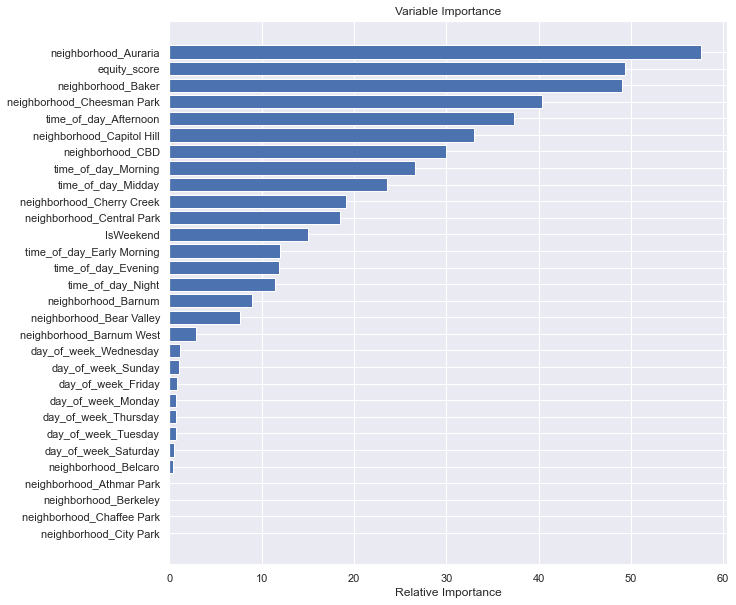

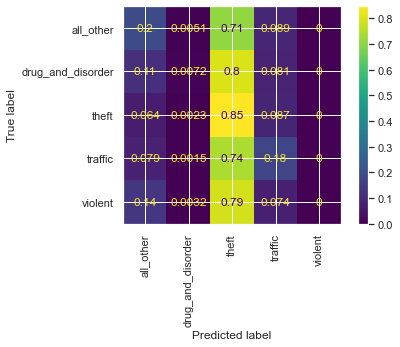

df5
[11:16:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.362359


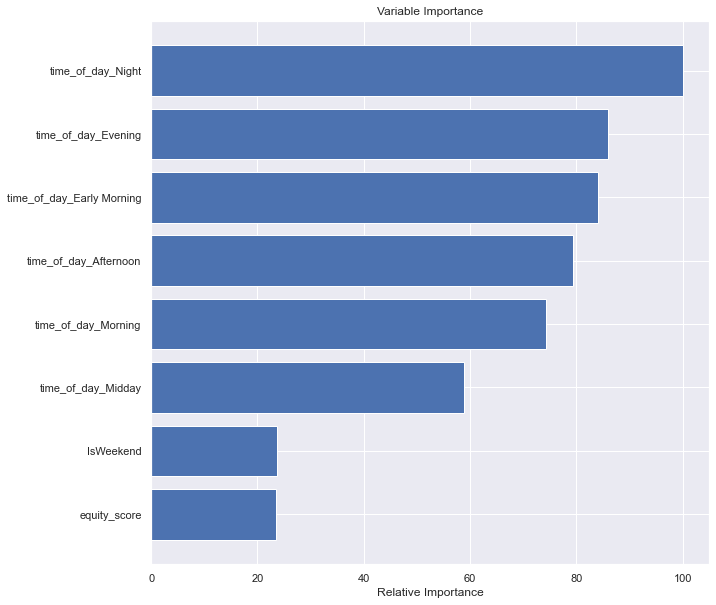

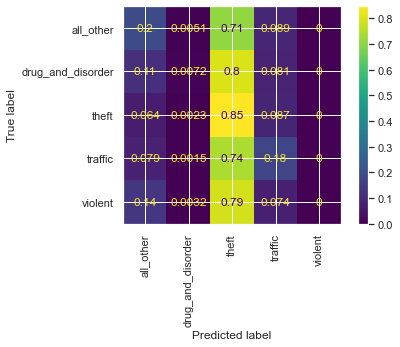

df6
[11:16:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363335


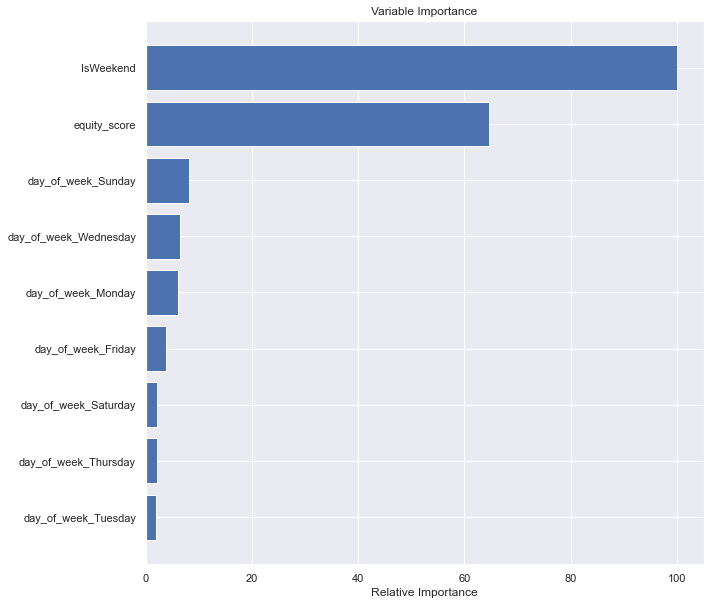

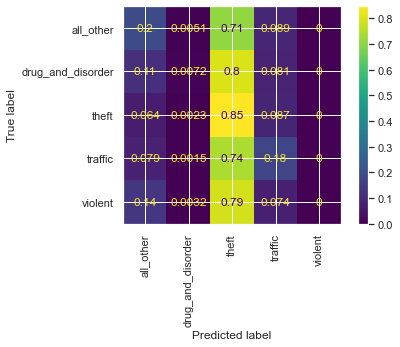

df7
[11:16:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.363335


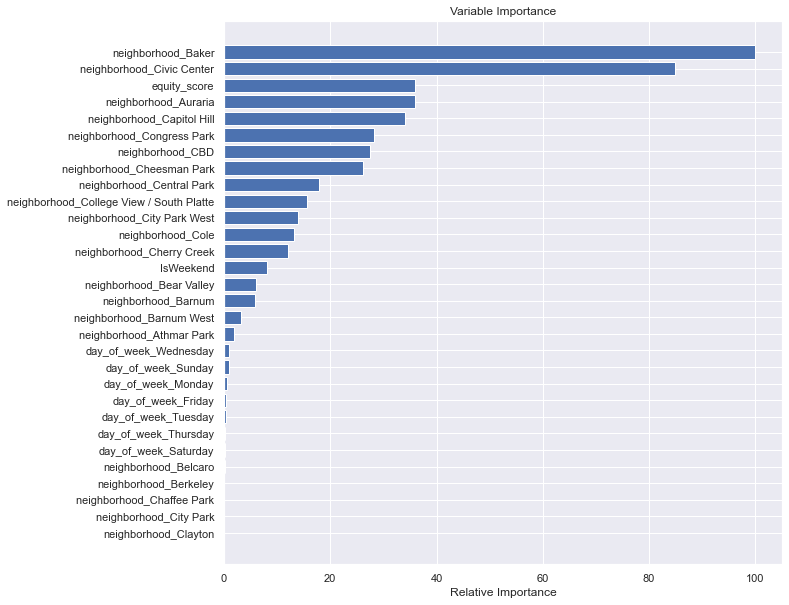

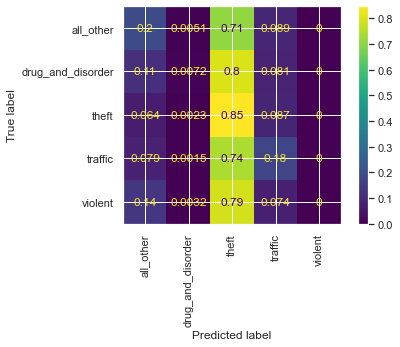

CPU times: total: 8min 48s
Wall time: 1min 39s


In [8]:
%%time
for idx, df in enumerate(sets):
    print('df'+str(idx+1))
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    xg_cl = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=10, seed=123)
    xg_cl.fit(X_train_scaled,y_train)
    preds = xg_cl.predict(X_test)
    accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
    print("accuracy: %f" % (accuracy))
    feature_importance = xg_cl.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
    sorted_idx = np.argsort(feature_importance)[:30]
    pos = np.arange(sorted_idx.shape[0]) + .5
    sorted_idx.size  
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                  display_labels=clf.classes_,
                                 xticks_rotation='vertical',
                                                  normalize='true') 
    plt.show()


## 2.4 ADA Boost

df1
accuracy: 0.372139


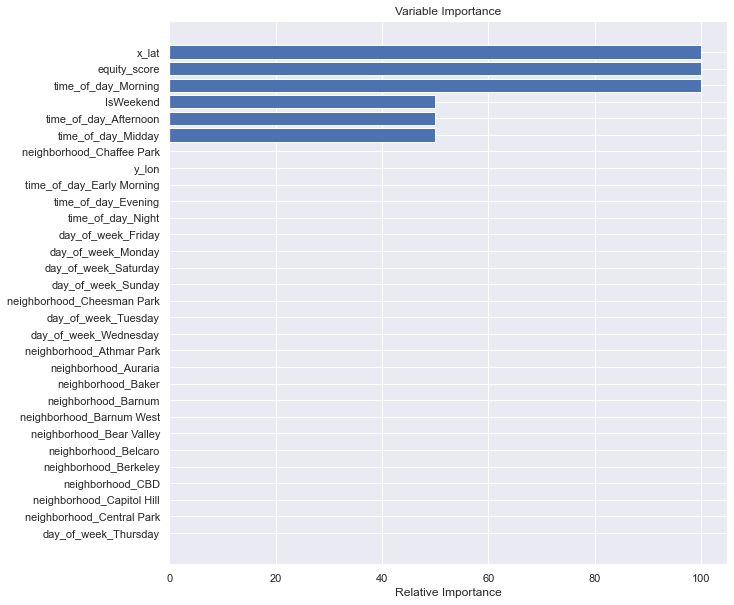

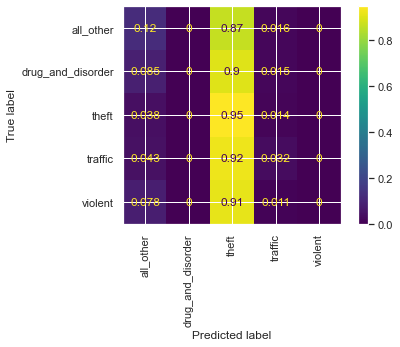

df2
accuracy: 0.369769


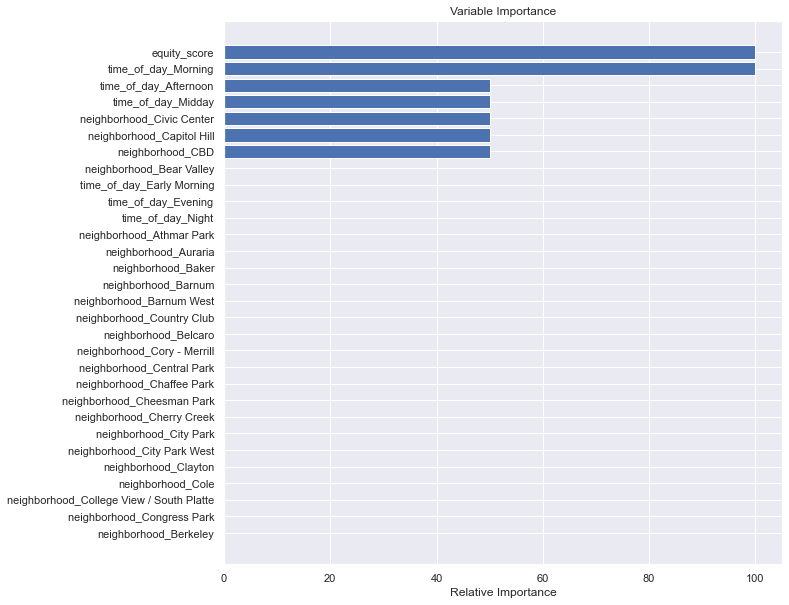

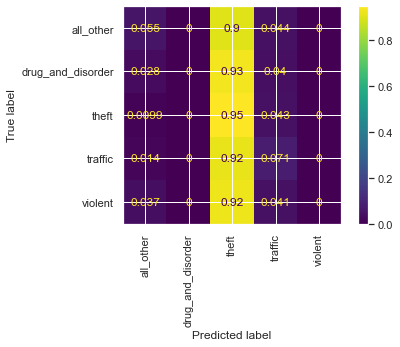

df3
accuracy: 0.369147


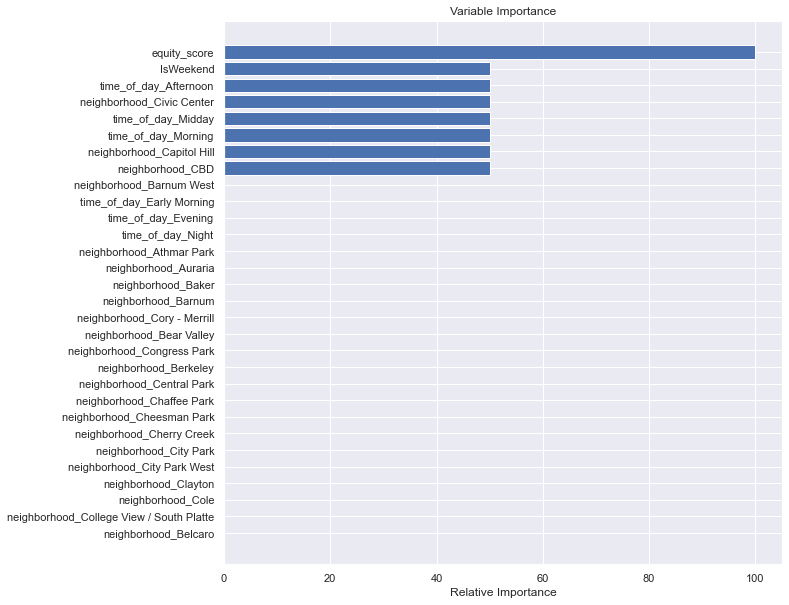

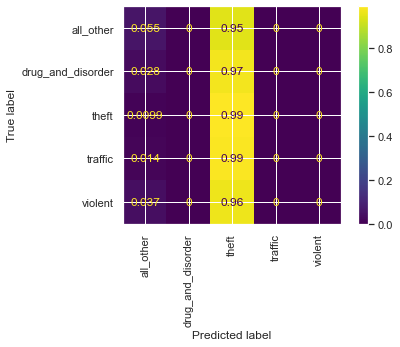

df4
accuracy: 0.369147


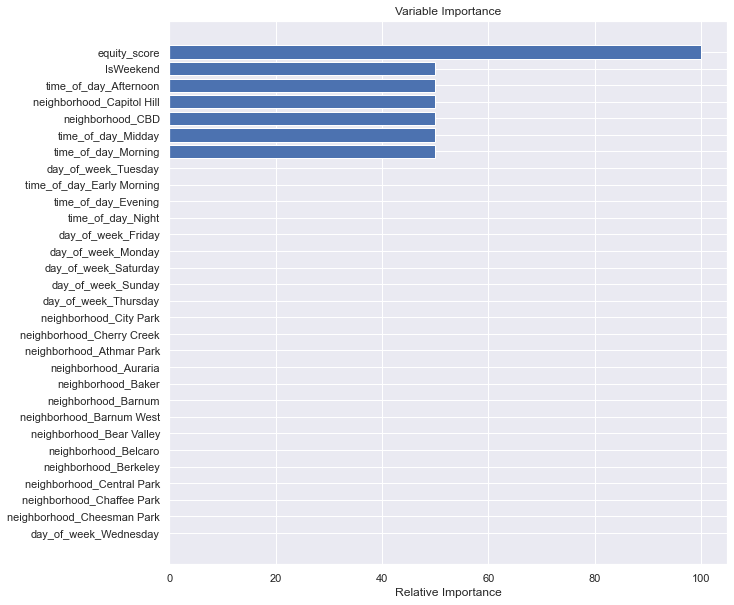

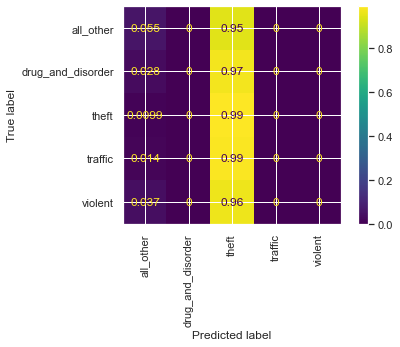

df5
accuracy: 0.365651


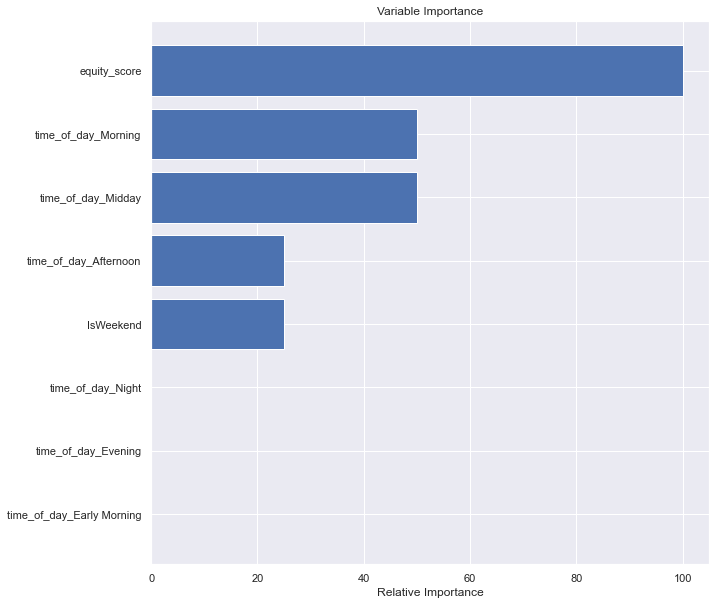

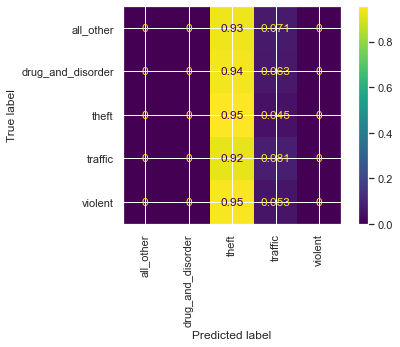

df6
accuracy: 0.363174


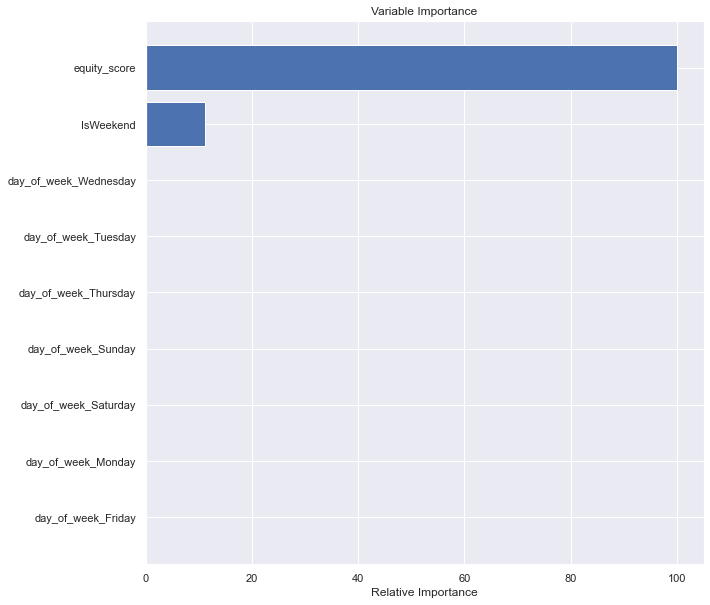

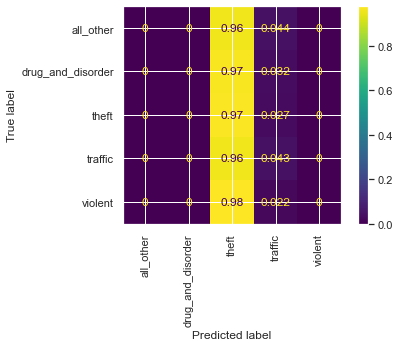

df7
accuracy: 0.374231


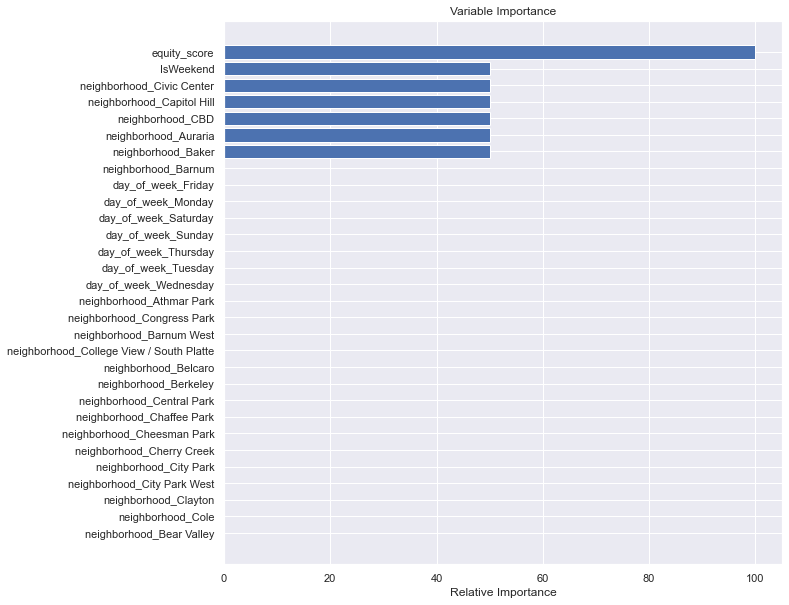

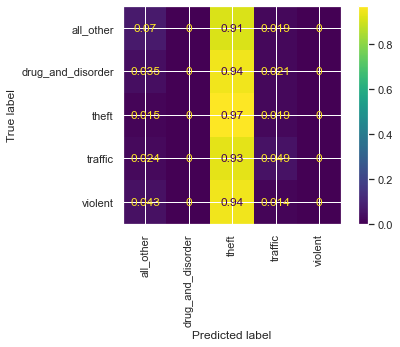

CPU times: total: 1min 22s
Wall time: 1min 22s


In [9]:
%%time


for idx, df in enumerate(sets):
    print('df'+str(idx+1))
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    clf = AdaBoostClassifier(n_estimators=10)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
    print("accuracy: %f" % (accuracy))
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
    sorted_idx = np.argsort(feature_importance)[:30]
    pos = np.arange(sorted_idx.shape[0]) + .5
    sorted_idx.size  
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                                   display_labels=clf.classes_,
                                                   xticks_rotation='vertical',
                                                   normalize='true') 
    plt.show()


In [10]:
np.unique(y_pred, return_counts=True)

(array(['all_other', 'theft', 'traffic'], dtype=object),
 array([ 2963, 87872,  2415], dtype=int64))

In [11]:
len(y_test) #93250

print(np.unique(y_test,return_counts=True))
y_test1 = np.array([16064, 14443, 33881, 21422,  7440])
print(y_test1/93250)

(array(['all_other', 'drug_and_disorder', 'theft', 'traffic', 'violent'],
      dtype=object), array([16064, 14443, 33881, 21422,  7440], dtype=int64))
[0.1722681  0.15488472 0.36333512 0.22972654 0.07978552]


In [12]:
# %%time
# y = df2.iloc[:,0] 
# X = df2.iloc[:,1:]
# X=pd.get_dummies(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)


# pipe = Pipeline([('scaler', StandardScaler()), ('ada', AdaBoostClassifier())])
#  # The pipeline can be used as any other estimator
#  # and avoids leaking the test set into the train se
# pipe.fit(X_train, y_train)
# pipe.score(X_test, y_test)


## 2.5 KNN with grid search

In [13]:
# %%time
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# for df in sets:
#     y = df.iloc[:,0] 
#     X = df.iloc[:,1:]
#     X=pd.get_dummies(X)
# #     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
# #     scaler = preprocessing.StandardScaler().fit(X_train)
# #     X_train_scaled=scaler.transform(X_train)
# #     X_test_scaled=scaler.transform(X_test)
#     param_grid = {'n_neighbors':np.arange(1,50)}
#     knn = KNeighborsClassifier()
#     knn_cv= GridSearchCV(knn,param_grid,cv=5)
#     knn_cv.fit(X,y)
#     print("Best Score:" + str(knn_cv.best_score_))
#     print("Best Parameters: " + str(knn_cv.best_params_))

## 2.6 KNN

df1
accuracy: 0.419796
CPU times: total: 0 ns
Wall time: 998 Âµs


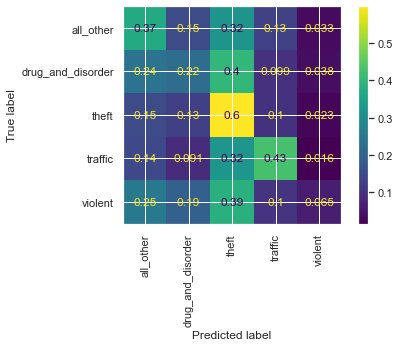

df2
accuracy: 0.305340
CPU times: total: 0 ns
Wall time: 0 ns


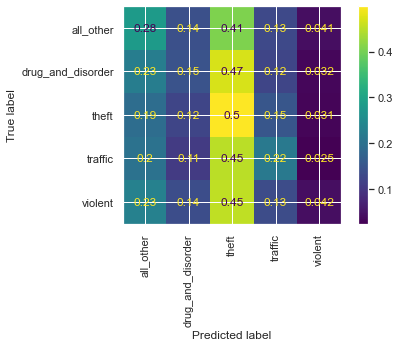

df3
accuracy: 0.308515
CPU times: total: 0 ns
Wall time: 0 ns


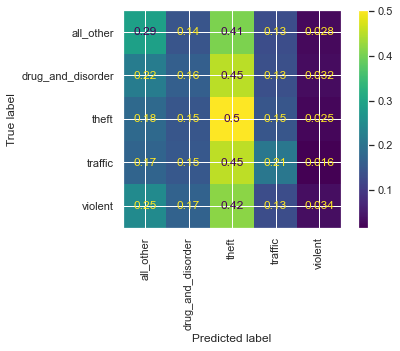

df4
accuracy: 0.316032
CPU times: total: 0 ns
Wall time: 0 ns


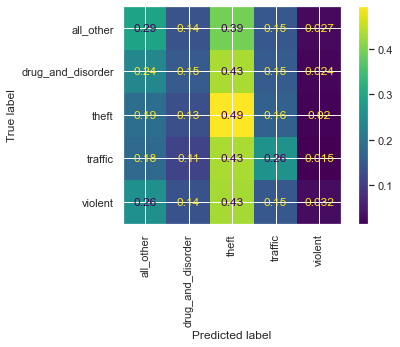

df5
accuracy: 0.302831
CPU times: total: 0 ns
Wall time: 0 ns


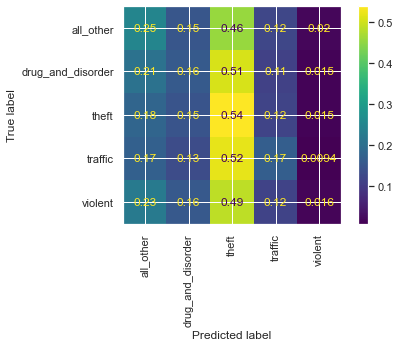

df6
accuracy: 0.292343
CPU times: total: 0 ns
Wall time: 0 ns


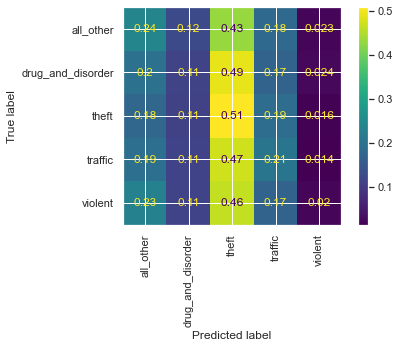

df7
accuracy: 0.295142
CPU times: total: 0 ns
Wall time: 0 ns


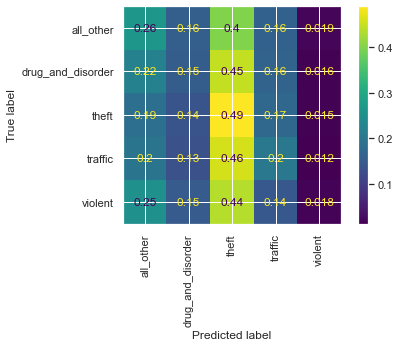

CPU times: total: 1h 30min 49s
Wall time: 1h 1s


In [14]:
%%time


for idx, df in enumerate(sets):
    print('df'+str(idx+1))
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    clf = KNeighborsClassifier()
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
    print("accuracy: %f" % (accuracy))
    %time
#     feature_importance = clf.feature_importances_
#     # make importances relative to max importance
#     feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
#     sorted_idx = np.argsort(feature_importance)[:30]
#     pos = np.arange(sorted_idx.shape[0]) + .5
#     sorted_idx.size  
#     plt.figure(figsize=(10,10))
#     plt.barh(pos, feature_importance[sorted_idx], align='center')
#     plt.yticks(pos, X.columns[sorted_idx])
#     plt.xlabel('Relative Importance')
#     plt.title('Variable Importance')
#     plt.show()
    disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                                   display_labels=clf.classes_,
                                                   xticks_rotation='vertical',
                                                   normalize='true') 
    plt.show()

##  SVM,SVC

accuracy: 0.307775


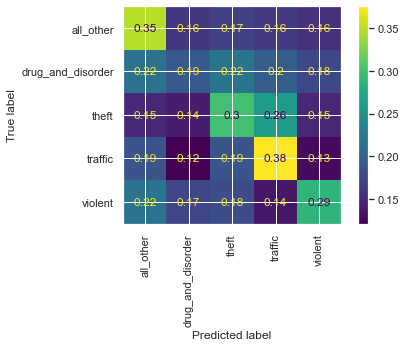

accuracy: 0.288472


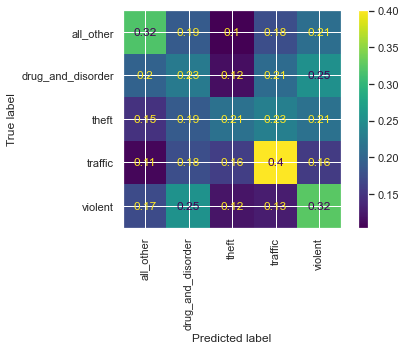

accuracy: 0.296515


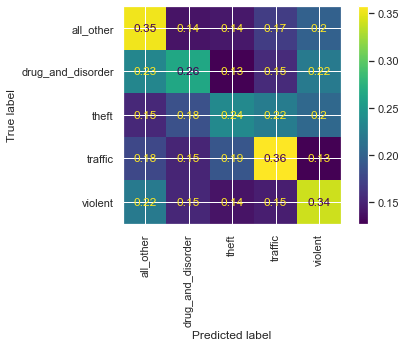

accuracy: 0.264879


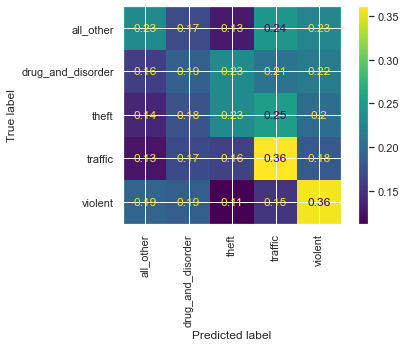

accuracy: 0.286327


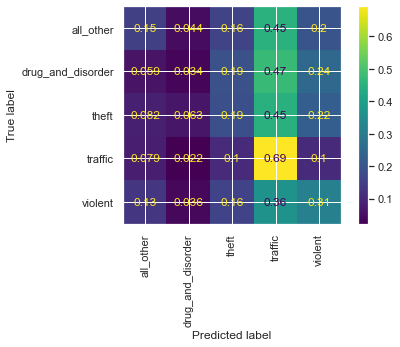

accuracy: 0.213405


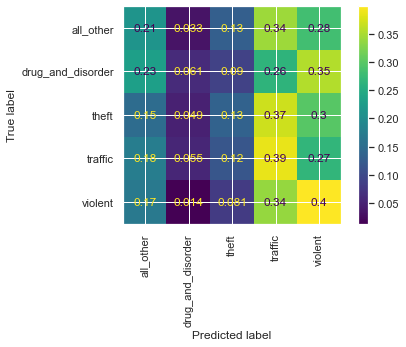

accuracy: 0.267024


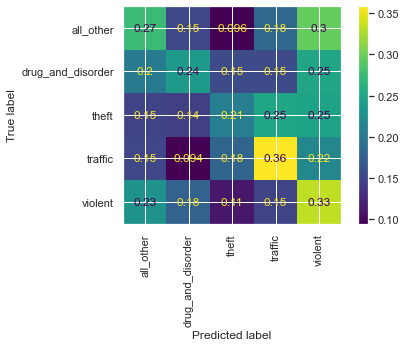

CPU times: total: 52.7 s
Wall time: 52.9 s


In [15]:
%%time 
#ran overnight, didn't go




from sklearn import svm
for df in sets:
    df = df.sample(frac = 0.02)
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    clf = svm.SVC(class_weight='balanced',tol=10**-3)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
    print("accuracy: %f" % (accuracy))
#     feature_importance = clf.feature_importances_
    # make importances relative to max importance
#     feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
#     sorted_idx = np.argsort(feature_importance)[:30]
#     pos = np.arange(sorted_idx.shape[0]) + .5
#     sorted_idx.size  
#     plt.figure(figsize=(10,10))
#     plt.barh(pos, feature_importance[sorted_idx], align='center')
#     plt.yticks(pos, X.columns[sorted_idx])
#     plt.xlabel('Relative Importance')
#     plt.title('Variable Importance') 
#     plt.show()
    disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                                   display_labels=clf.classes_,
                                                   xticks_rotation='vertical',
                                                   normalize='true') 
    plt.show()

accuracy: 0.293159


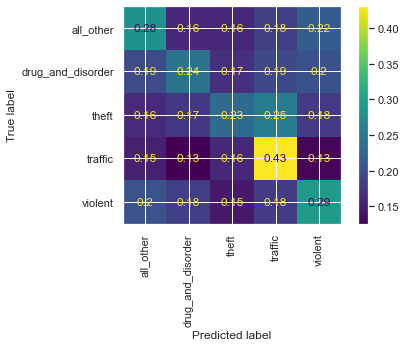

accuracy: 0.299378


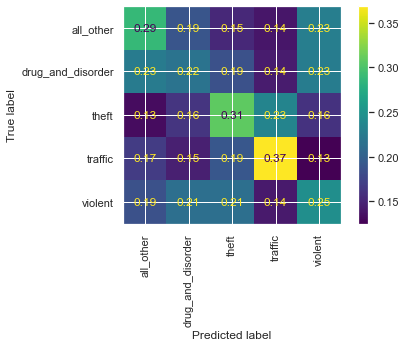

accuracy: 0.299593


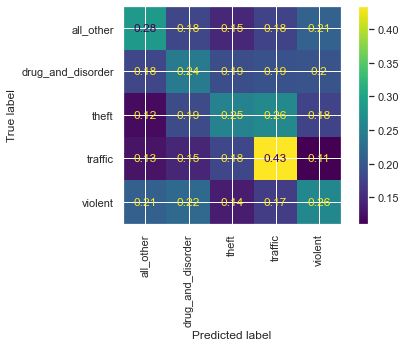

accuracy: 0.290157


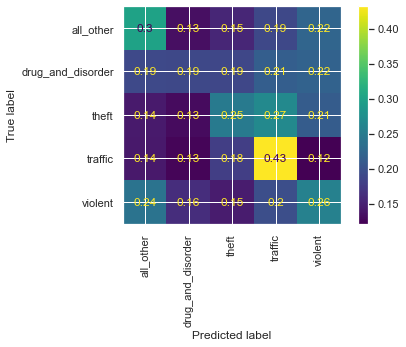

accuracy: 0.291872


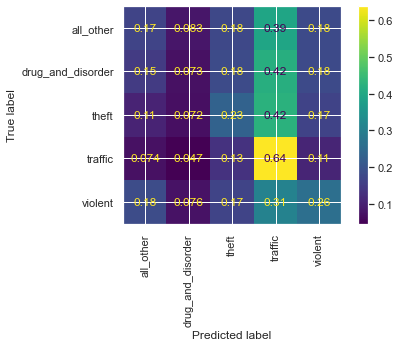

accuracy: 0.211666


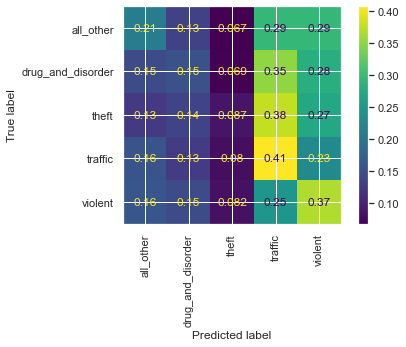

accuracy: 0.283937


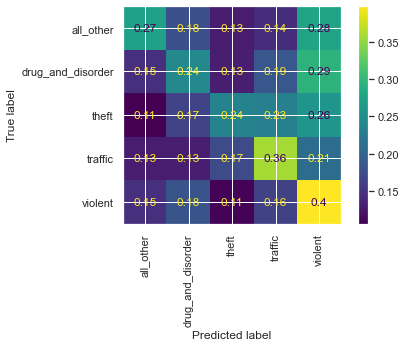

CPU times: total: 7min 23s
Wall time: 7min 25s


In [16]:
%%time 
#ran overnight, didn't go




from sklearn import svm
for df in sets:
    df = df.sample(frac = 0.05)
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    X=pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    clf = svm.SVC(class_weight='balanced',tol=10**-3)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
    print("accuracy: %f" % (accuracy))
#     feature_importance = clf.feature_importances_
    # make importances relative to max importance
#     feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
#     sorted_idx = np.argsort(feature_importance)[:30]
#     pos = np.arange(sorted_idx.shape[0]) + .5
#     sorted_idx.size  
#     plt.figure(figsize=(10,10))
#     plt.barh(pos, feature_importance[sorted_idx], align='center')
#     plt.yticks(pos, X.columns[sorted_idx])
#     plt.xlabel('Relative Importance')
#     plt.title('Variable Importance') 
#     plt.show()
    disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                                   display_labels=clf.classes_,
                                                   xticks_rotation='vertical',
                                                   normalize='true') 
    plt.show()

# Results Breakdown

### Gradient Boosting:
    Results found between .383 and .363 accuracty at different learning rates for the different data sets
    
### Random Forest
    Results peaked at .466 with df1 data
    Accuracy Range was from .366 to .466 depending on the dataset
    Equity Score was the most common significant factor for the different datasets
    
### XGB Classifier
    consistent scores around .363 range

### ADA Boost
    .365-.374 accuracy range

### KNN
    Using the Lat and Long data the KNN was able to produce an impressive .41 accuracy rate
    Without that data it did poorly, in the .29 range, one of the lowest of all the classification schemes

In [17]:
df.crime_category.value_counts(normalize=True)

theft                0.358356
traffic              0.229753
all_other            0.175875
drug_and_disorder    0.155499
violent              0.080516
Name: crime_category, dtype: float64